<a href="https://colab.research.google.com/github/AbirRaufun/ML_SPRING_23_24/blob/main/Class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing library



In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

**Downloading data and also train **

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

X_train.shape





170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

**Showing the size of training and test data **

In [3]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


**Configuring Default Parameters to show the images

In [4]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

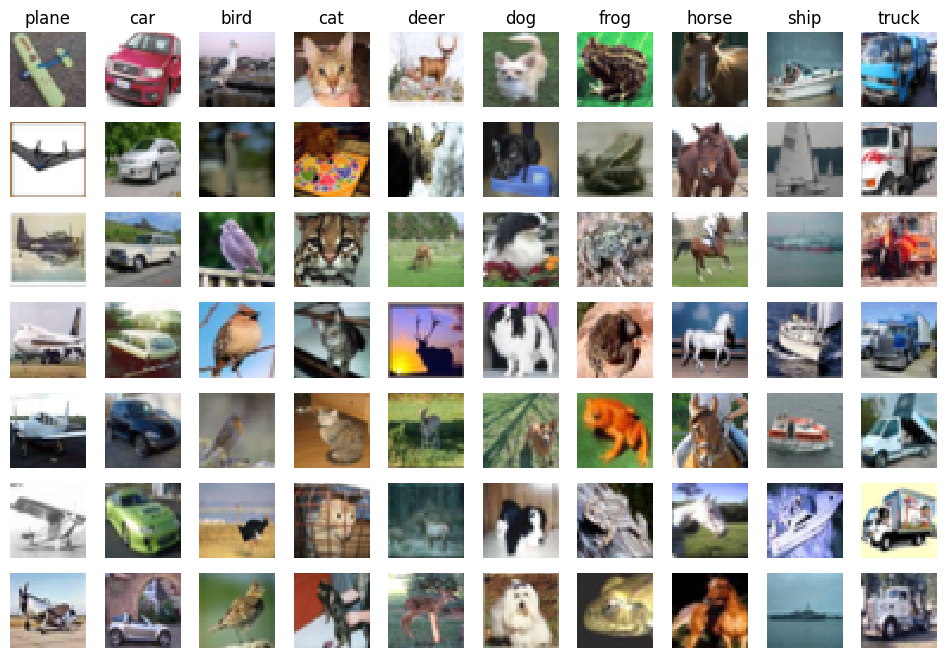

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**training and testing a model**

In [6]:
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [8]:
dists, indices = knn.kneighbors(X_test)
print(dists.shape)

(1000, 10)


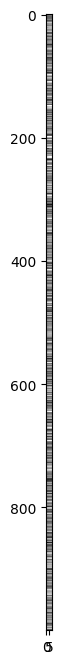

In [9]:
plt.imshow(dists, interpolation='none')
plt.show()

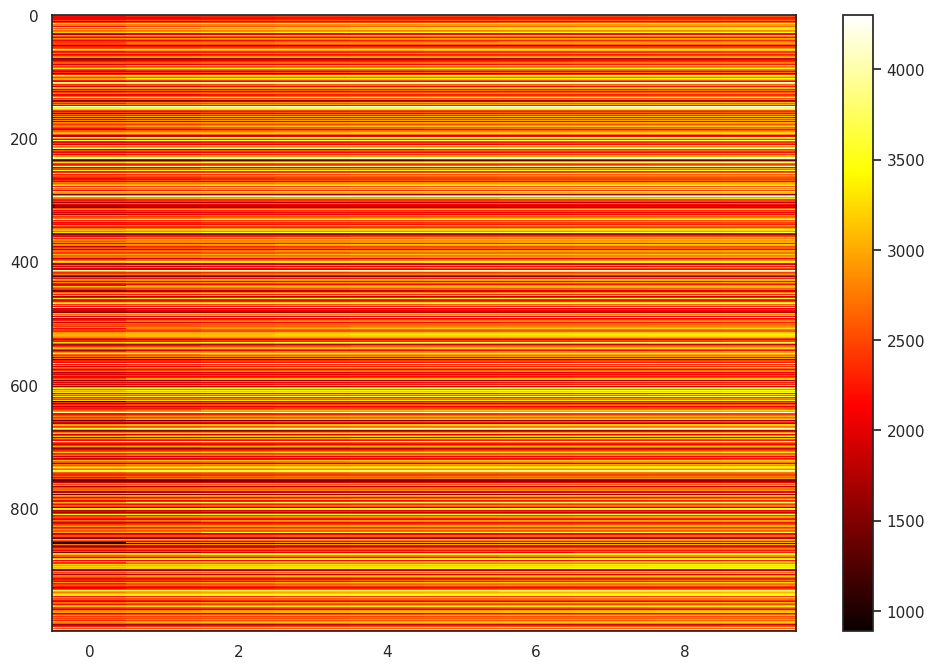

In [10]:
import seaborn as sns
sns.set()
with sns.axes_style('white'):
  plt.imshow(dists, aspect='auto', cmap='hot')
  plt.colorbar()

In [ ]:
Z = knn.score(X_test, y_test)

print(Z*100)

28.799999999999997


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

**At K=1 the score is the highest**

In [ ]:
A = classifier.score(X_test, y_test)

print(A*100)

29.599999999999998


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
classifier = KNeighborsClassifier(n_neighbors=5)
classification = KNeighborsClassifier(n_neighbors=1)

classification.fit(X_train, y_train)

B = classification.score(X_test, y_test)
print(A*100)
print(B*100)
print(Z*100)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


29.599999999999998
28.299999999999997
28.799999999999997


**From K= 1 to 20 to see the accuracy value  **

In [ ]:
from sklearn.metrics import accuracy_score
for k in range (1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_classifier.fit(X_train,y_train)
    y_knn = knn_classifier.predict(X_test)
    acc_score = accuracy_score(y_knn,y_test)
    print('Accuracy for k={0} => {1}'.format(k,acc_score * 100))



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=1 => 28.299999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=2 => 25.2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=3 => 28.000000000000004


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=4 => 28.599999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=5 => 29.599999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=6 => 28.7


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=7 => 28.499999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=8 => 27.6


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=9 => 28.299999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=10 => 28.799999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=11 => 28.999999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=12 => 28.499999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=13 => 28.7


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=14 => 29.4


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=15 => 28.9


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=16 => 29.9


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=17 => 28.999999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=18 => 29.099999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=19 => 29.4


**Accuracy Score and Confusion matrix to see the satate of knn **

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_knn = accuracy_score(y_knn,y_test)
confusion_knn = confusion_matrix(y_knn,y_test)
print('Accuracy Score= ',accuracy_knn)
print('confusion_matrix= \n',confusion_knn)

Accuracy Score=  0.294
confusion_matrix= 
 [[47 10 16  6  8  7  3  8 13 13]
 [ 0  5  0  0  0  0  0  0  1  0]
 [10 13 44 26 26 28 34 27  3 11]
 [ 2  3  0 15  0  6  0  3  0  3]
 [12 15 27 24 40 24 37 27  8 16]
 [ 0  0  3  7  0  7  1  4  3  0]
 [ 2 15  5 20  7  9 34  9  1 10]
 [ 0  0  0  1  3  0  1 14  0  3]
 [29 26  5  3  6  4  2 10 77 42]
 [ 1  2  0  1  0  1  0  0  0 11]]


Cross-validation
We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation

In [ ]:
from sklearn.metrics import accuracy_score
num_folds = 5
k_choices = [1, 3, 5, 7, 8, 10, 12, 15, 20, 50, 100]
X_train_folds = []
y_train_folds = []
y_train_ = y_train.reshape(-1, 1)
X_train_folds , y_train_folds = np.array_split(X_train, 10), np.array_split(y_train_,10)
k_to_accuracies = {}
for k_ in k_choices:
  k_to_accuracies.setdefault(k_, [])


for i in range(num_folds):
  classifier = KNeighborsClassifier()
  X_val_train = np.vstack(X_train_folds[0:i] + X_train_folds[i+1:])
  y_val_train = np.vstack(y_train_folds[0:i] + y_train_folds[i+1:])
  y_val_train = y_val_train[:,0]
  classifier.fit(X_val_train, y_val_train)
  for k_ in k_choices:
    y_val_pred = classifier.predict_proba(X_train_folds[i])
    num_correct = np.sum(y_val_pred == y_train_folds[i])
    accuracy = float(num_correct) / len(y_val_pred)
    k_to_accuracies[k_] = k_to_accuracies[k_] + [accuracy]







In [ ]:
for k in sorted(k_to_accuracies):
  for accuracy in k_to_accuracies[k]:
    print ('k=%d,accuracy=%f'%(k,accuracy*100))








k=1,accuracy=74.300000
k=1,accuracy=73.700000
k=1,accuracy=70.600000
k=1,accuracy=70.500000
k=1,accuracy=78.000000
k=3,accuracy=74.300000
k=3,accuracy=73.700000
k=3,accuracy=70.600000
k=3,accuracy=70.500000
k=3,accuracy=78.000000
k=5,accuracy=74.300000
k=5,accuracy=73.700000
k=5,accuracy=70.600000
k=5,accuracy=70.500000
k=5,accuracy=78.000000
k=7,accuracy=74.300000
k=7,accuracy=73.700000
k=7,accuracy=70.600000
k=7,accuracy=70.500000
k=7,accuracy=78.000000
k=8,accuracy=74.300000
k=8,accuracy=73.700000
k=8,accuracy=70.600000
k=8,accuracy=70.500000
k=8,accuracy=78.000000
k=10,accuracy=74.300000
k=10,accuracy=73.700000
k=10,accuracy=70.600000
k=10,accuracy=70.500000
k=10,accuracy=78.000000
k=12,accuracy=74.300000
k=12,accuracy=73.700000
k=12,accuracy=70.600000
k=12,accuracy=70.500000
k=12,accuracy=78.000000
k=15,accuracy=74.300000
k=15,accuracy=73.700000
k=15,accuracy=70.600000
k=15,accuracy=70.500000
k=15,accuracy=78.000000
k=20,accuracy=74.300000
k=20,accuracy=73.700000
k=20,accuracy=70.

**Ploting the Cross validation to judge the accuracy**



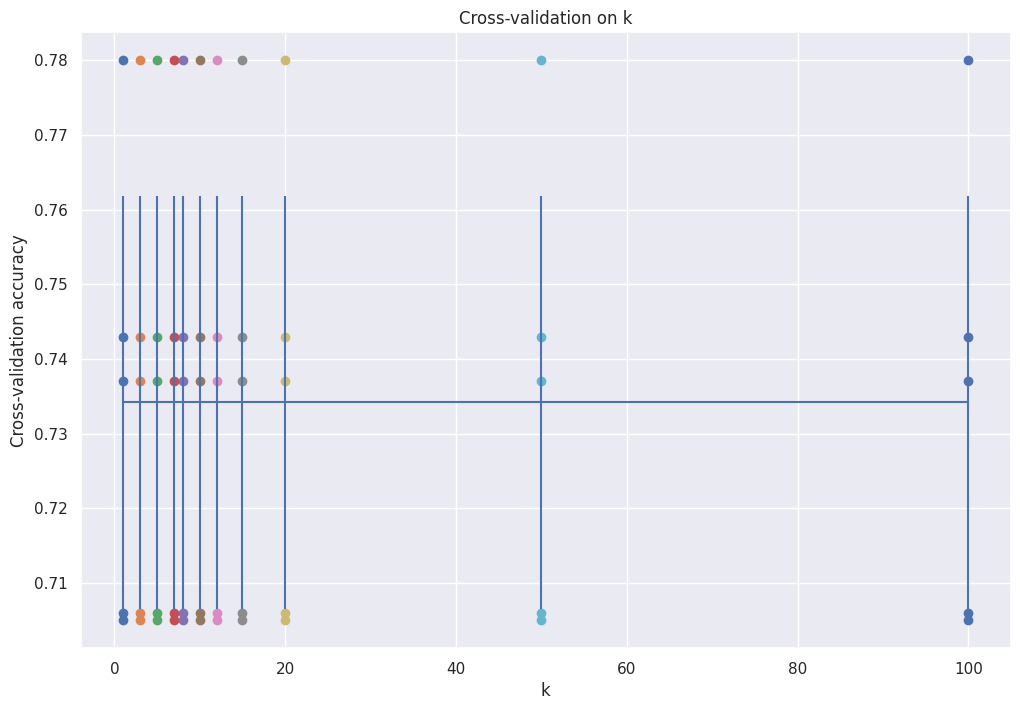

In [ ]:
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies),accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()



